In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("/kaggle/input/heart-disease-uci/heart.csv")

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Exploratory data analysis

### Patient distibution

In [4]:
# Parans for seaborn
sns.set(style="whitegrid")
sns.set_palette(sns.color_palette("Set2", n_colors=5))

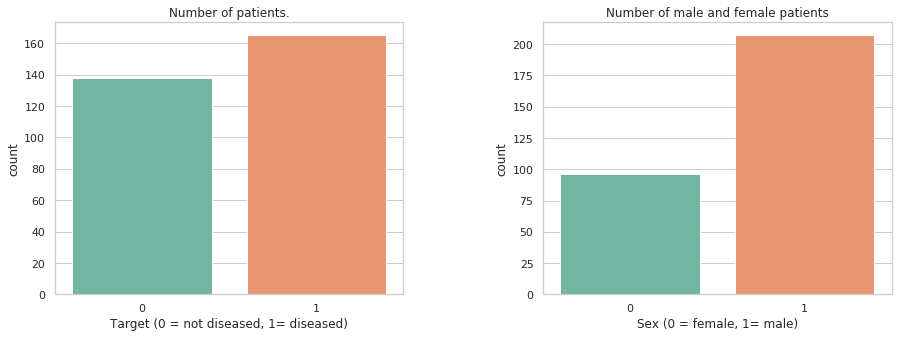

In [5]:
plt.figure(figsize=(15,12))
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,2,1)
plt.title("Number of patients.")
sns.countplot(x="target", data=data)
plt.xlabel("Target (0 = not diseased, 1= diseased)")

plt.subplot(2,2,2)
plt.title("Number of male and female patients")
sns.countplot(x="sex", data=data)
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

### Cholesterol, resting blood pressure and maximum heart rate according to age

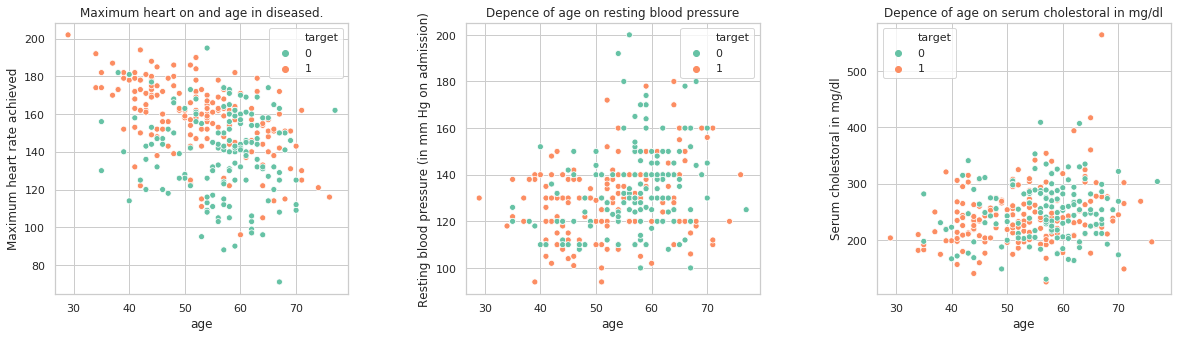

In [6]:
plt.figure(figsize=(20,5))

plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(1,3,1)
plt.title("Maximum heart on and age in diseased.")
sns.scatterplot(x="age", y="thalach",hue="target", data=data)
plt.ylabel('Maximum heart rate achieved')

plt.subplot(1,3,2)
plt.title("Depence of age on resting blood pressure")
sns.scatterplot(x="age",y="trestbps",hue="target",data=data)
plt.ylabel('Resting blood pressure (in mm Hg on admission)')

plt.subplot(1,3,3)
plt.title("Depence of age on serum cholestoral in mg/dl")
sns.scatterplot(x="age",y="chol",hue="target",data=data)
plt.ylabel('Serum cholestoral in mg/dl')
plt.show()

### Heart Disease Frequency for Ages

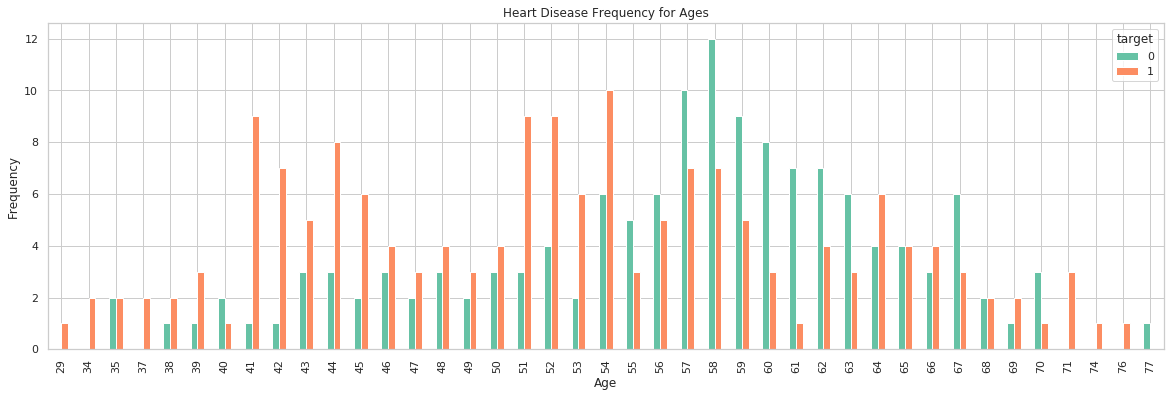

In [7]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### Number of cases depending on the type of pain

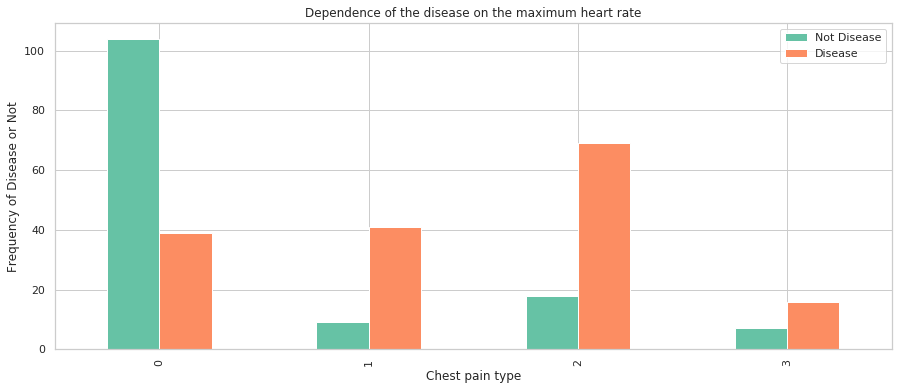

In [8]:
pd.crosstab(data.cp,data.target).plot(kind="bar",figsize=(15,6))
plt.title("Dependence of the disease on the maximum heart rate")
plt.xlabel("Chest pain type")
plt.legend(["Not Disease", "Disease"])
plt.ylabel("Frequency of Disease or Not")
plt.show()

### Dependence of the disease on Fasting blood sugar

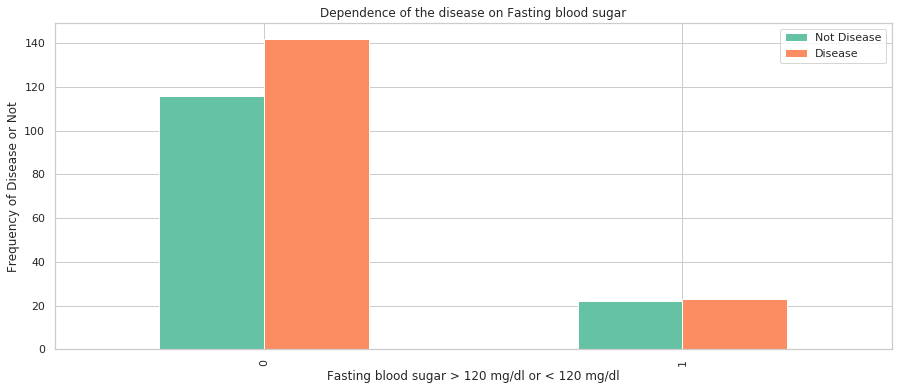

In [9]:
pd.crosstab(data.fbs,data.target).plot(kind="bar",figsize=(15,6))
plt.title("Dependence of the disease on Fasting blood sugar")
plt.xlabel("Fasting blood sugar > 120 mg/dl or < 120 mg/dl")
plt.legend(["Not Disease", "Disease"])
plt.ylabel("Frequency of Disease or Not")
plt.show()

### Dependence of the disease on resting electrocardiographic results

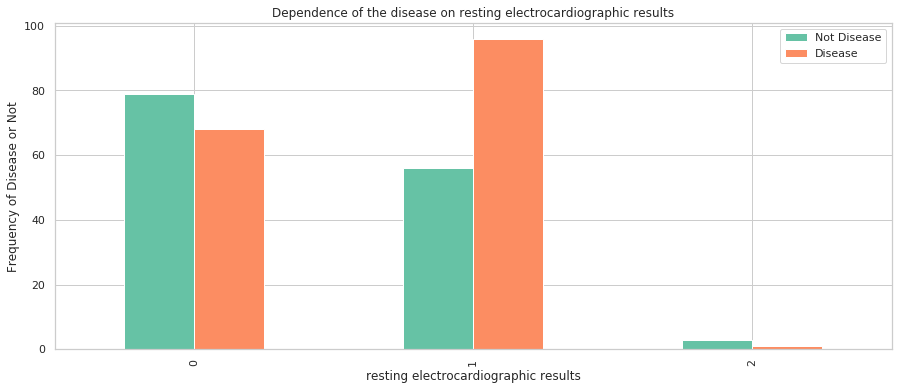

In [10]:
pd.crosstab(data.restecg,data.target).plot(kind="bar",figsize=(15,6))
plt.title("Dependence of the disease on resting electrocardiographic results")
plt.xlabel("resting electrocardiographic results")
plt.legend(["Not Disease", "Disease"])
plt.ylabel("Frequency of Disease or Not")
plt.show()

### Dependence of the disease on exercise induced angina

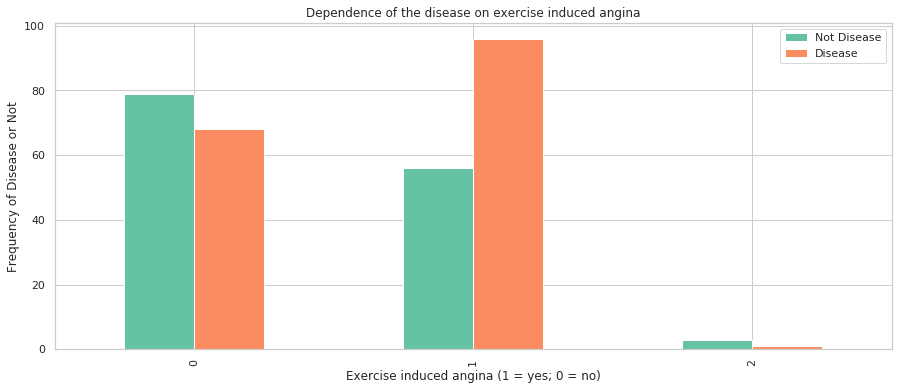

In [11]:
pd.crosstab(data.restecg,data.target).plot(kind="bar",figsize=(15,6))
plt.title("Dependence of the disease on exercise induced angina")
plt.xlabel("Exercise induced angina (1 = yes; 0 = no)")
plt.legend(["Not Disease", "Disease"])
plt.ylabel("Frequency of Disease or Not")
plt.show()

### Dependence of the disease on the slope of the peak exercise ST segment

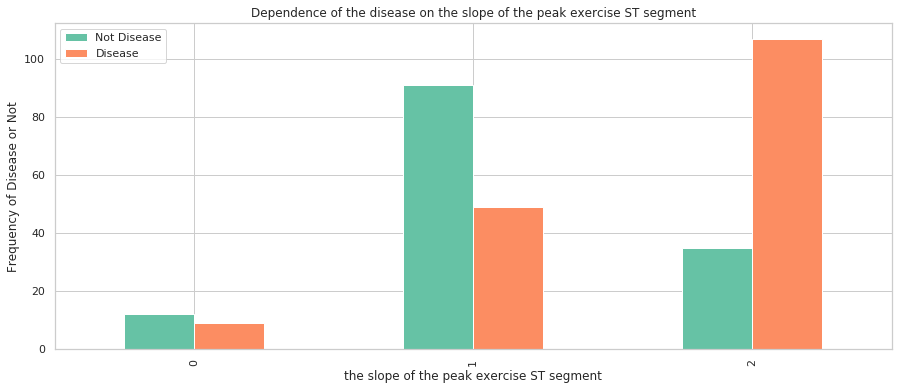

In [12]:
pd.crosstab(data.slope,data.target).plot(kind="bar",figsize=(15,6))
plt.title("Dependence of the disease on the slope of the peak exercise ST segment")
plt.xlabel("the slope of the peak exercise ST segment")
plt.legend(["Not Disease", "Disease"])
plt.ylabel("Frequency of Disease or Not")
plt.show()

### Dependence of the disease on ST depression induced by exercise relative to rest

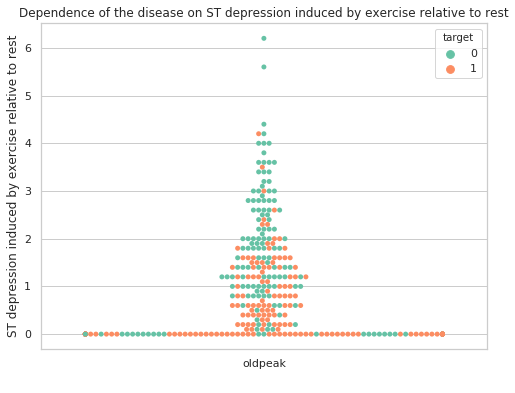

In [13]:
plt.figure(figsize=(8,6))
df_to_plot = pd.melt(data[["target","oldpeak"]],id_vars=["target"],var_name="oldpeak",value_name="values")
sns.swarmplot(x="oldpeak",y="values",hue="target", data=df_to_plot,)
plt.title("Dependence of the disease on ST depression induced by exercise relative to rest")
plt.ylabel("ST depression induced by exercise relative to rest")
plt.xlabel(" ")
plt.show()

## Prepare data for machine learnig

### Find correlation

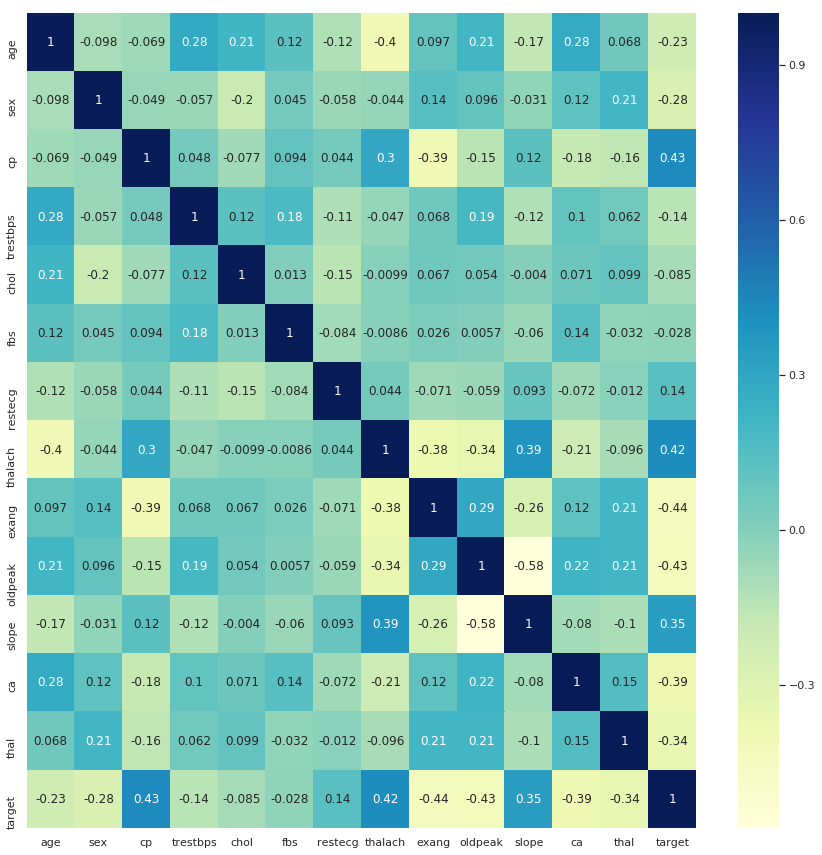

In [14]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot=True,cmap='YlGnBu')
plt.show()

Find correlation more than 0.8

In [15]:
(data.corr() > 0.8).replace(False,' ')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,True,,,,,,,,,,,,,
sex,,True,,,,,,,,,,,,
cp,,,True,,,,,,,,,,,
trestbps,,,,True,,,,,,,,,,
chol,,,,,True,,,,,,,,,
fbs,,,,,,True,,,,,,,,
restecg,,,,,,,True,,,,,,,
thalach,,,,,,,,True,,,,,,
exang,,,,,,,,,True,,,,,
oldpeak,,,,,,,,,,True,,,,


### Convert variables to categorial

In [16]:
cp_dummies = pd.get_dummies(data['cp'], prefix = "cp")
thal_dummies = pd.get_dummies(data['thal'], prefix = "thal")
slope_dummies = pd.get_dummies(data['slope'], prefix = "slope")

data = data.drop(columns = ['cp', 'thal', 'slope'])

frames = [data, cp_dummies, thal_dummies, slope_dummies]
data = pd.concat(frames, axis = 1)
data.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,0,1


### Create X and y

In [17]:
X = data.drop(['target'], axis = 1)
y = data.target

### Create train test sampes

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=0)

## Machine learnig

In [20]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [21]:
accuracies = {}

### Random forest

In [22]:
rf_clf = RandomForestClassifier()

In [23]:
params = {
    'n_estimators': range(10,1001,50),
    'max_depth': range(1,13,2),
    'min_samples_leaf': range(1,30),
    'min_samples_split': range(2,50,2)
}

In [24]:
search = RandomizedSearchCV(rf_clf,params,cv=5,n_jobs=-1, iid=True)
search.fit(X_train,y_train)
best_rf = search.best_estimator_

y_pred_rf = best_rf.predict(X_test)

In [25]:
accuracies['random_forest'] = round(best_rf.score(X_test,y_test)*100,2)
cm_rf = confusion_matrix(y_test,y_pred_rf)

print('Random forest accuracy is: {}%'.format(accuracies['random_forest']))

Random forest accuracy is: 88.52%


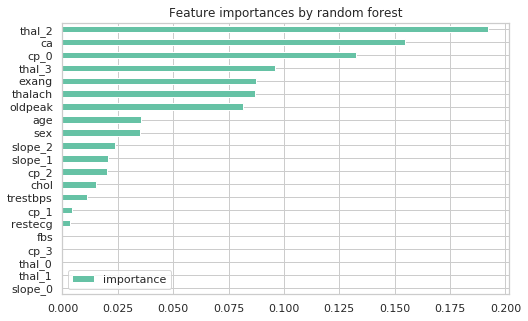

In [26]:
importances = pd.DataFrame(best_rf.feature_importances_, index=X_test.columns, columns=['importance'])
importances.sort_values('importance').plot(kind='barh', figsize=(8,5))
plt.title('Feature importances by random forest')
plt.show()

### Logistic regression

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
lr = LogisticRegression(random_state=0,solver='liblinear')
lr.fit(X_train,y_train)

y_pred_lr = lr.predict(X_test)

In [29]:
accuracies['lr_score'] = round(lr.score(X_test,y_test)*100,2)
cm_lr = confusion_matrix(y_test,y_pred_lr)

print("Logistic regression accuracy: {}%".format(accuracies['lr_score']))

Logistic regression accuracy: 85.25%


## Evaluate models

### Confusion Matrixes

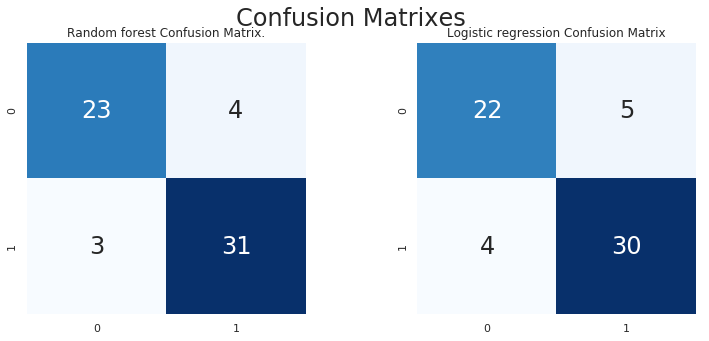

In [30]:
sns.set_style("whitegrid")

plt.figure(figsize=(12,5))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(1,2,1)
plt.title("Random forest Confusion Matrix.")
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})


plt.subplot(1,2,2)
plt.title("Logistic regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})
plt.show()

### Accuracy

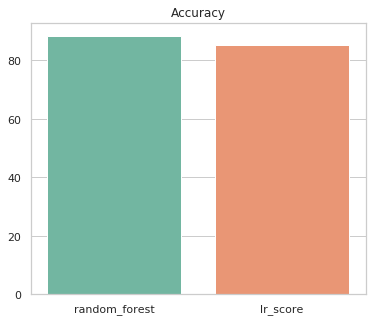

In [31]:
plt.figure(figsize=(6,5))
plt.title('Accuracy')
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()))
plt.show()

In [32]:
accuracies

{'random_forest': 88.52, 'lr_score': 85.25}

### Recal, precision and F1 score

In [33]:
from sklearn.metrics import recall_score, precision_score, f1_score

In [34]:
predictions = [y_pred_rf, y_pred_lr]

scores = {
    'recall_score': [recall_score(y_test,prediction) for prediction in predictions],
    'precision_score':  [precision_score(y_test,prediction) for prediction in predictions],
    'f1_score': [f1_score(y_test,prediction) for prediction in predictions],
}

scores = pd.DataFrame(scores,index=['Random forest','Logistic regression'])

In [35]:
scores

,recall_score,precision_score,f1_score
Random forest,0.911765,0.885714,0.898551
Logistic regression,0.882353,0.857143,0.869565


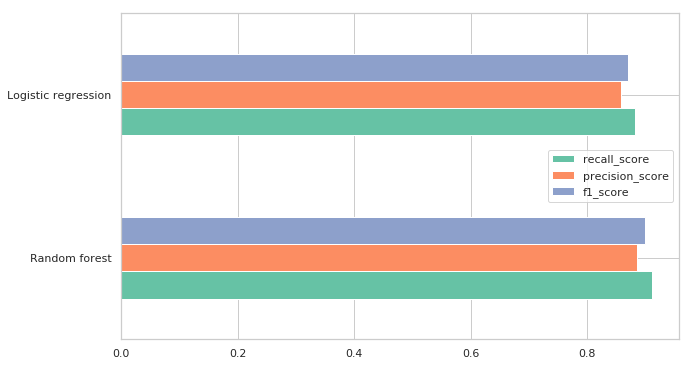

In [36]:
scores.plot(kind="barh",figsize=(10,6))
plt.show()